In [1]:
import pandas as pd  # for data manipulation
pd.set_option('display.max_columns', None) # because I have a death wish (show all columns)
pd.set_option('display.max_rows', None)
import matplotlib  # basic graphing
from datetime import datetime  # for dates and stuff
import functools  # some nifty function decorators

%matplotlib inline

In [2]:
raw_data = pd.read_csv("data/takehome_data.tsv", delimiter='\t', low_memory=False)

In [3]:
# Notable oddities I immediately spot
# query_num_guests sometimes == -1000 (replace with 1?)
# listing_property_type is an int but really its categorical (its an id/reference to a property type table)
#  tbh might just delete that column

raw_data.head(10)

,id_search,label,id_user,id_listing,ts_search,ds_search,ds_book,ds_contact,query_market,query_checkin,query_checkout,query_num_guests,query_num_children,query_num_infants,query_radius,query_price_max,query_price_min,query_center_lat,query_center_lng,listing_is_new,listing_total_price,listing_instant_bookable,listing_lat,listing_lng,listing_review_rating,listing_review_count,listing_property_type,listing_room_type,listing_num_beds,listing_num_bedrooms,listing_num_bathrooms,listing_person_capacity,listing_has_pro_pictures,listing_num_recent_reservations,listing_location_rating,listing_cleanliness_rating,listing_checkin_rating,listing_value_rating,listing_communication_rating,listing_accuracy_rating,listing_num_books_90day,listing_occupancy_rate,listing_monthly_discount,listing_weekly_discount,listing_cleaning_fee,listing_monthly_price_factor,listing_weekly_price_factor,listing_minimum_nights,listing_maximum_nights
0,1d320d4d-4826-42b6-9ebe-97d8f2adc543,impression,e566365a0638690cc6572c40e99729ac,6f6d6ba9c29e63a1fdb85742a598b5b5,11/26/18 17:18,11/26/18,NaN,NaN,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.744589,-1.0,-1,-22.98,-43.20,0,284.74063,True,-22.98,-43.20,4.729166,48.0,47.0,Entire Home,3.0,NaN,1,4,True,0,4.978724,4.770834,4.914894,4.595745,4.744681,4.787234,14.0,0.730061,1,0,52.246060,0.9,1.00,1.0,1125.0
1,94f40f5e-5d7c-4593-b745-220c8db1070d,impression,e566365a0638690cc6572c40e99729ac,15eaa0a653431dfb2c80e3e031866e49,11/26/18 17:18,11/26/18,NaN,NaN,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.372312,-1.0,-1,-22.98,-43.20,0,228.57620,False,-22.98,-43.20,4.940299,67.0,NaN,Entire Home,4.0,2.0,2,6,True,0,4.865672,4.895523,5.000000,4.742424,5.000000,5.000000,NaN,0.624277,0,0,54.858360,1,1.00,2.0,30.0
2,e9649afc-d30a-4b77-bb0a-8cfd5c3423ea,impression,e566365a0638690cc6572c40e99729ac,69a48538dedb0975b59feaa6ba38567a,11/26/18 17:19,11/26/18,NaN,NaN,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.186147,-1.0,-1,-22.98,-43.19,0,208.72273,True,-22.98,-43.19,NaN,86.0,NaN,Entire Home,2.0,1.0,1.5,5,False,0,4.908046,4.885057,4.896552,4.666666,4.908046,4.873563,12.0,NaN,1,1,39.184544,0.85,0.92,1.0,1120.0
3,75c98fbc-84e9-4dde-b882-87f9985d1942,impression,e566365a0638690cc6572c40e99729ac,79b9a8296d922ad4ebbd44c511049b90,11/26/18 17:19,11/26/18,NaN,NaN,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.744608,-1.0,-1,-22.98,-43.19,0,NaN,False,-22.98,-43.19,4.642857,14.0,1.0,Entire Home,2.0,1.0,1,4,False,0,4.692308,4.642857,4.692308,4.615385,4.714286,4.714286,5.0,0.066667,1,1,39.184544,0.64,0.95,4.0,6.0
4,11886a08-c9da-4b41-98cd-8d4109a35779,impression,e566365a0638690cc6572c40e99729ac,cc68e4db29988e237131d93e022d7316,11/26/18 17:19,11/26/18,NaN,NaN,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.093075,-1.0,-1,-22.98,-43.19,0,326.53745,False,-22.98,-43.19,5.000000,1.0,35.0,Entire Home,3.0,0.0,1,3,False,0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.000000,0,0,47.021454,NaN,NaN,3.0,1125.0
5,67a8991c-9ca8-4e2e-b36f-91825d2ea375,impression,e566365a0638690cc6572c40e99729ac,5c04baf2872180462a1f3463f6bfca57,11/26/18 17:19,11/26/18,NaN,NaN,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.093073,-1.0,-1,-22.98,-43.19,0,287.35294,True,-22.98,-43.19,4.629630,NaN,1.0,Entire Home,1.0,1.0,1,5,False,0,4.981132,4.555555,4.849057,4.584906,4.660378,4.867925,8.0,0.761364,1,1,0.000000,0.56,0.84,2.0,95.0
6,0216c145-cc31-4fd8-95c0-3e6104d3e233,click,e566365a0638690cc6572c40e99729ac,f9e4ff27c1cf7f6bb25e9600d90f69e2,11/26/18 17:06,11/26/18,NaN,NaN,Rio de Janeiro,4/24/19,4/29/19,-1000,0,0,2.978395,-1.0,-1,-22.98,-43.18,0,224.91899,False,-22.96,-43.18,4.883721,86.0,NaN,Entire Home,2.0,1.0,1,4,False,0,4.870588,4.894118,4.952941,4.800000,4.905882,4.917647,39.0,0.900000,1,1,0.000000,0.99,0.99,2.0,28.0
7,0e9566e7-1dae-4dff-b0ed-ab154848cc69,impression,e566365a0638690cc6572c40e99729ac,52984f4167005b997a87288157aefd22,11/26/18 17:17,11/26/18,NaN,NaN,Rio de Janeiro,4/24/19,4/29/19,2,0,0,1.489169,-1.0,-1,-22.98,-43.20,0,300.41443,True,-22.98,-43.21,4.923077,41.0,1.0,Entire Home,2.0,NaN,1,4,False,0,4.897436,4.

In [4]:
# Uh I'm sorry what? Why does this row's listing_num_bathrooms has a space as its value?
raw_data[(raw_data==' ').sum(axis=1) > 0]

/Users/sinanozdemir/Desktop/airbnb_takehome/env/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,id_search,label,id_user,id_listing,ts_search,ds_search,ds_book,ds_contact,query_market,query_checkin,query_checkout,query_num_guests,query_num_children,query_num_infants,query_radius,query_price_max,query_price_min,query_center_lat,query_center_lng,listing_is_new,listing_total_price,listing_instant_bookable,listing_lat,listing_lng,listing_review_rating,listing_review_count,listing_property_type,listing_room_type,listing_num_beds,listing_num_bedrooms,listing_num_bathrooms,listing_person_capacity,listing_has_pro_pictures,listing_num_recent_reservations,listing_location_rating,listing_cleanliness_rating,listing_checkin_rating,listing_value_rating,listing_communication_rating,listing_accuracy_rating,listing_num_books_90day,listing_occupancy_rate,listing_monthly_discount,listing_weekly_discount,listing_cleaning_fee,listing_monthly_price_factor,listing_weekly_price_factor,listing_minimum_nights,listing_maximum_nights
24,b4fcb278-7ea2-4c84-b582-600728076f23,impression,d562a7100aefe2b2b6b0622d885a09c6,717cee11b1957b1147b59b502679668f,11/25/18 19:56,11/25/18,NaN,NaN,Sao Paulo,11/26/18,11/29/18,1,0,0,2.245034,-1.0,-1,-23.68,-46.69,0,78.35916,False,-23.67,-46.67,5.0,3.0,2.0,Private Room,4.0,2.0,,4,False,0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,0.051948,0,0,5.223937,,NaN,1.0,20.0


In [5]:
raw_data = raw_data.join(pd.get_dummies(raw_data['label']))

del raw_data['listing_property_type']

for categorical_column in ['listing_room_type']:
    raw_data = raw_data.join(pd.get_dummies(raw_data[categorical_column], prefix='listing'))
    del raw_data['listing_room_type']
    
# needed to have boolean columns appear in .corr()
raw_data.replace({True: 1, False: 0}, inplace=True)

# make these into datetime objects
# Warning: kind of slow ( ~ 1m )
raw_data['ts_search'] = pd.to_datetime(raw_data['ts_search'])
raw_data['ds_contact'] = pd.to_datetime(raw_data['ds_contact'])
raw_data['ds_book'] = pd.to_datetime(raw_data['ds_book'])
raw_data['ds_search'] = pd.to_datetime(raw_data['ds_search'])



# replace NaN with None (so fillna works)
raw_data = raw_data.where((pd.notnull(raw_data)), None)

In [6]:
raw_data.head(2)

,id_search,label,id_user,id_listing,ts_search,ds_search,ds_book,ds_contact,query_market,query_checkin,query_checkout,query_num_guests,query_num_children,query_num_infants,query_radius,query_price_max,query_price_min,query_center_lat,query_center_lng,listing_is_new,listing_total_price,listing_instant_bookable,listing_lat,listing_lng,listing_review_rating,listing_review_count,listing_num_beds,listing_num_bedrooms,listing_num_bathrooms,listing_person_capacity,listing_has_pro_pictures,listing_num_recent_reservations,listing_location_rating,listing_cleanliness_rating,listing_checkin_rating,listing_value_rating,listing_communication_rating,listing_accuracy_rating,listing_num_books_90day,listing_occupancy_rate,listing_monthly_discount,listing_weekly_discount,listing_cleaning_fee,listing_monthly_price_factor,listing_weekly_price_factor,listing_minimum_nights,listing_maximum_nights,book,click,host_contact,impression,listing_Entire Home,listing_Private Room,listing_Shared Room
0,1d320d4d-4826-42b6-9ebe-97d8f2adc543,impression,e566365a0638690cc6572c40e99729ac,6f6d6ba9c29e63a1fdb85742a598b5b5,2018-11-26 17:18:00,2018-11-26,NaT,NaT,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.744589,-1,-1,-22.98,-43.2,0,284.741,1,-22.98,-43.2,4.72917,48,3,None,1,4,1,0,4.97872,4.77083,4.91489,4.59574,4.74468,4.78723,14,0.730061,1,0,52.2461,0.9,1,1,1125,0,0,0,1,1,0,0
1,94f40f5e-5d7c-4593-b745-220c8db1070d,impression,e566365a0638690cc6572c40e99729ac,15eaa0a653431dfb2c80e3e031866e49,2018-11-26 17:18:00,2018-11-26,NaT,NaT,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.372312,-1,-1,-22.98,-43.2,0,228.576,0,-22.98,-43.2,4.9403,67,4,2,2,6,1,0,4.86567,4.89552,5,4.74242,5,5,None,0.624277,0,0,54.8584,1,1,2,30,0,0,0,1,1,0,0


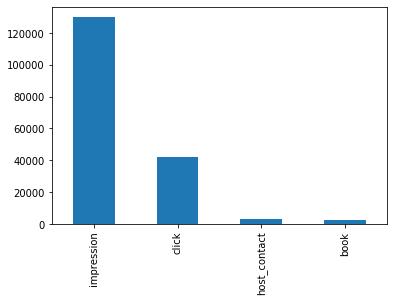

In [7]:
# Some EDA (Exploratory Data Analysis)

# Loads of impresssions, not a lot of contacts or bookings (might make a nice response)
raw_data['label'].value_counts().plot(kind='bar')

In [8]:
# show the query columns
raw_data.filter(regex="query_*", axis=1).head()

,query_market,query_checkin,query_checkout,query_num_guests,query_num_children,query_num_infants,query_radius,query_price_max,query_price_min,query_center_lat,query_center_lng
0,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.744589,-1,-1,-22.98,-43.2
1,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.372312,-1,-1,-22.98,-43.2
2,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.186147,-1,-1,-22.98,-43.19
3,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.744608,-1,-1,-22.98,-43.19
4,Rio de Janeiro,4/24/19,4/29/19,2,0,0,0.0930749,-1,-1,-22.98,-43.19


In [9]:
# show the listing columns
raw_data.filter(regex="listing_*", axis=1).head()

,id_listing,listing_is_new,listing_total_price,listing_instant_bookable,listing_lat,listing_lng,listing_review_rating,listing_review_count,listing_num_beds,listing_num_bedrooms,listing_num_bathrooms,listing_person_capacity,listing_has_pro_pictures,listing_num_recent_reservations,listing_location_rating,listing_cleanliness_rating,listing_checkin_rating,listing_value_rating,listing_communication_rating,listing_accuracy_rating,listing_num_books_90day,listing_occupancy_rate,listing_monthly_discount,listing_weekly_discount,listing_cleaning_fee,listing_monthly_price_factor,listing_weekly_price_factor,listing_minimum_nights,listing_maximum_nights,listing_Entire Home,listing_Private Room,listing_Shared Room
0,6f6d6ba9c29e63a1fdb85742a598b5b5,0,284.741,1,-22.98,-43.2,4.72917,48,3,None,1,4,1,0,4.97872,4.77083,4.91489,4.59574,4.74468,4.78723,14,0.730061,1,0,52.2461,0.9,1,1,1125,1,0,0
1,15eaa0a653431dfb2c80e3e031866e49,0,228.576,0,-22.98,-43.2,4.9403,67,4,2,2,6,1,0,4.86567,4.89552,5,4.74242,5,5,None,0.624277,0,0,54.8584,1,1,2,30,1,0,0
2,69a48538dedb0975b59feaa6ba38567a,0,208.723,1,-22.98,-43.19,None,86,2,1,1.5,5,0,0,4.90805,4.88506,4.89655,4.66667,4.90805,4.87356,12,None,1,1,39.1845,0.85,0.92,1,1120,1,0,0
3,79b9a8296d922ad4ebbd44c511049b90,0,None,0,-22.98,-43.19,4.64286,14,2,1,1,4,0,0,4.69231,4.64286,4.69231,4.61538,4.71429,4.71429,5,0.0666667,1,1,39.1845,0.64,0.95,4,6,1,0,0
4,cc68e4db29988e237131d93e022d7316,0,326.537,0,-22.98,-43.19,5,1,3,0,1,3,0,0,5,5,5,5,5,5,0,0,0,0,47.0215,None,None,3,1125,1,0,0


In [10]:
# Womp, thats not great
raw_data.isnull().sum()

id_search                               0
label                                   0
id_user                                 0
id_listing                              0
ts_search                               0
ds_search                               0
ds_book                            175348
ds_contact                         172315
query_market                            0
query_checkin                           0
query_checkout                          0
query_num_guests                        0
query_num_children                      0
query_num_infants                       0
query_radius                            0
query_price_max                         0
query_price_min                         0
query_center_lat                        0
query_center_lng                        0
listing_is_new                          0
listing_total_price                  9021
listing_instant_bookable                0
listing_lat                             0
listing_lng                       

In [11]:
# ASSUMPTION JUNCTION, WHATS YOUR FUNCTION?
# if listing_review_count,listing_has_pro_pictures,listing_num_books_90day
#  are null, assume its 0
# if listing_num_beds,listing_num_bedrooms,listing_num_bathrooms,listing_minimum_nights,listing_has_pro_pictures,listing_monthly_price_factor,listing_weekly_price_factor
#  are null, assume its 1

# if query_num_guests is -1000, assume its 1

# everything else that is null will get imputed in real time


raw_data["listing_review_count,listing_has_pro_pictures,listing_num_books_90day".split(',')] = raw_data["listing_review_count,listing_has_pro_pictures,listing_num_books_90day".split(',')].fillna(0)
raw_data["listing_num_beds,listing_num_bedrooms,listing_num_bathrooms,listing_minimum_nights,listing_has_pro_pictures,listing_monthly_price_factor,listing_weekly_price_factor".split(',')] = raw_data["listing_num_beds,listing_num_bedrooms,listing_num_bathrooms,listing_minimum_nights,listing_has_pro_pictures,listing_monthly_price_factor,listing_weekly_price_factor".split(',')].fillna(1)
raw_data = raw_data.replace({" ": 1})

In [12]:
raw_data.isnull().sum()

id_search                               0
label                                   0
id_user                                 0
id_listing                              0
ts_search                               0
ds_search                               0
ds_book                            175348
ds_contact                         172315
query_market                            0
query_checkin                           0
query_checkout                          0
query_num_guests                        0
query_num_children                      0
query_num_infants                       0
query_radius                            0
query_price_max                         0
query_price_min                         0
query_center_lat                        0
query_center_lng                        0
listing_is_new                          0
listing_total_price                  9021
listing_instant_bookable                0
listing_lat                             0
listing_lng                       

In [13]:
corr_data = raw_data.corr()

# remove the labels from the index
corr_data = corr_data.drop(['book', 'click', 'host_contact', 'impression'], axis=0)


for label in ['book', 'click', 'host_contact']:
    print(label, '\n', corr_data[label].sort_values()[:5], '\n', corr_data[label].sort_values()[-6:-1], '\n\n')

book 
 listing_is_new            -0.027065
listing_person_capacity   -0.015958
listing_total_price       -0.014347
listing_num_beds          -0.012775
listing_Shared Room       -0.011578
Name: book, dtype: float64 
 listing_location_rating    0.030349
listing_accuracy_rating    0.030481
listing_value_rating       0.030510
listing_review_rating      0.030872
listing_num_books_90day    0.037302
Name: book, dtype: float64 


click 
 listing_Private Room   -0.041740
listing_total_price    -0.033186
listing_num_bedrooms   -0.031719
listing_Shared Room    -0.028172
listing_is_new         -0.027644
Name: click, dtype: float64 
 listing_communication_rating    0.020332
listing_checkin_rating          0.020622
listing_location_rating         0.021237
listing_minimum_nights          0.028737
listing_occupancy_rate          0.043882
Name: click, dtype: float64 


host_contact 
 listing_instant_bookable   -0.050351
listing_occupancy_rate     -0.024470
listing_num_books_90day    -0.020994
listing_r

In [14]:
# quick thoughts:

# listing_instant_bookable is negatively correlated to host_contact makes sense ("if its instant, no need to contact the host")
# listing_num_books_90day and pretty much ALL of the rating values are positively correlated to book makes sense ("if other people booked and liked it, I probably will to")
# listing_is_new is negatively correlated to click and book makes sense ("its new I'd rather not be the first to get murdered here")
# listing_is_new is positively correlated to host contact makes sense ("its new I should make sure the host isn't crazy")
# listing_total_price is negatively correlated to book and click ("it's pricy, not for me right now")
# listing_Shared Room and listing_Private Room is negatively correlated to click and book makes sense ("eh, its just a room in a house, not that private, pass")


In [15]:
# given a user id and a date, calculate a simple vector showing the average values of listings that 
#  they clicked on, contacted, or booked before a certain date

# this is extremely important to conserve independence between rows (if we are trying to get a users preference 
#  for a search they made on the 26th, we shouldn't take into account a search they made on the 27th)
@functools.lru_cache(maxsize=1000, typed=False)  # cache results to save some time
def grab_user_preferences_before_date(id_user, date, verbose=False):
    relevant_rows = raw_data[(raw_data['id_user'] == id_user) & (raw_data['ts_search'] < date) & (raw_data['label'].isin(['click', 'book', 'host_contact']))].filter(regex='listing_*')
    if verbose:
        print(relevant_rows.shape)
    preference_vector = relevant_rows.mean()
    preference_vector.index = [i.replace('listing_', 'preference_') for i in preference_vector.index]
    return preference_vector[preference_vector.index.str.contains('preference_')]

def grab_user_preferences_by_row(row):
    return grab_user_preferences_before_date(row['id_user'], row['ts_search'])



In [16]:
# eg user e566365a0638690cc6572c40e99729ac's preferences changes between 17:18 and 17:20 
#  based on new clicks, books, etcs

grab_user_preferences_before_date("e566365a0638690cc6572c40e99729ac", datetime(2018, 11, 26, 17, 18)) == \
grab_user_preferences_before_date("e566365a0638690cc6572c40e99729ac", datetime(2018, 11, 26, 17, 20))


preference_is_new                      True
preference_total_price                False
preference_instant_bookable           False
preference_lat                        False
preference_lng                        False
preference_review_rating              False
preference_review_count               False
preference_num_beds                   False
preference_num_bedrooms               False
preference_person_capacity            False
preference_has_pro_pictures            True
preference_num_recent_reservations     True
preference_location_rating            False
preference_cleanliness_rating         False
preference_checkin_rating             False
preference_value_rating               False
preference_communication_rating       False
preference_accuracy_rating            False
preference_num_books_90day            False
preference_occupancy_rate             False
preference_monthly_discount           False
preference_weekly_discount            False
preference_cleaning_fee         

In [17]:
# Warning: slow ( ~ 20m )
preference_df = raw_data.apply(grab_user_preferences_by_row, axis=1)
preference_df.head()

,preference_Entire Home,preference_Private Room,preference_Shared Room,preference_accuracy_rating,preference_checkin_rating,preference_cleaning_fee,preference_cleanliness_rating,preference_communication_rating,preference_has_pro_pictures,preference_instant_bookable,preference_is_new,preference_lat,preference_lng,preference_location_rating,preference_maximum_nights,preference_minimum_nights,preference_monthly_discount,preference_monthly_price_factor,preference_num_bathrooms,preference_num_bedrooms,preference_num_beds,preference_num_books_90day,preference_num_recent_reservations,preference_occupancy_rate,preference_person_capacity,preference_review_count,preference_review_rating,preference_total_price,preference_value_rating,preference_weekly_discount,preference_weekly_price_factor
0,1.0,0.0,0.0,4.922478,4.933694,21.5515,4.88494,4.953586,0.0,0.833333,0.0,-22.97,-43.19,4.9229,278.0,2.5,0.833333,NaN,NaN,1.0,1.833333,19.5,0.0,0.880944,3.5,78.5,4.84509,180.335745,4.763605,0.833333,0.951667
1,1.0,0.0,0.0,4.922478,4.933694,21.5515,4.88494,4.953586,0.0,0.833333,0.0,-22.97,-43.19,4.9229,278.0,2.5,0.833333,NaN,NaN,1.0,1.833333,19.5,0.0,0.880944,3.5,78.5,4.84509,180.335745,4.763605,0.833333,0.951667
2,1.0,0.0,0.0,4.922478,4.933694,21.5515,4.88494,4.953586,0.0,0.833333,0.0,-22.97,-43.19,4.9229,278.0,2.5,0.833333,NaN,NaN,1.0,1.833333,19.5,0.0,0.880944,3.5,78.5,4.84509,180.335745,4.763605,0.833333,0.951667
3,1.0,0.0,0.0,4.922478,4.933694,21.5515,4.88494,4.953586,0.0,0.833333,0.0,-22.97,-43.19,4.9229,278.0,2.5,0.833333,NaN,NaN,1.0,1.833333,19.5,0.0,0.880944,3.5,78.5,4.84509,180.335745,4.763605,0.833333,0.951667
4,1.0,0.0,0.0,4.922478,4.933694,21.5515,4.88494,4.953586,0.0,0.833333,0.0,-22.97,-43.19,4.9229,278.0,2.5,0.833333,NaN,NaN,1.0,1.833333,19.5,0.0,0.880944,3.5,78.5,4.84509,180.335745,4.763605,0.833333,0.951667


In [19]:
# add in preference columns
raw_data = raw_data.join(preference_df)

# sort by time of search, so I can grab training and validation sets by time, not randomly
raw_data.sort_values(by='ts_search', inplace=True)

In [20]:
# multiple labels per row (ie if they booked, then they also clicked. If the ds_contact is filled and the label is book, then they also host contacted)

# label is 'book' but they also contacted the host. These rows can be put in three times (once for book, once for host contact, once for click)
# TECHNICALLY I should take into account the ds_search date for the preference vector, but that sounds like a job for Future Me
print(raw_data[(raw_data['label'] == 'book') & (raw_data['ds_contact'].notnull())].shape)

# These are also clicks but NOT host_contact
print(raw_data[(raw_data['label'] == 'book') & (raw_data['ds_contact'].isnull())].shape)
# no need to add more impression labels, I'm basically using that as "others"

# Side note, I'm not huge on having multiple copies of the same row with different labels in a classical
#  classification problem. In this case, I think it will be ok and we can enhance this in the future

(2207, 85)
(33, 85)


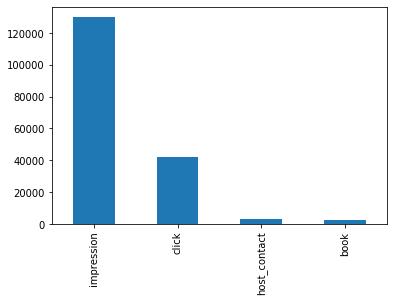

In [21]:
raw_data['label'].value_counts().plot(kind='bar')

In [22]:
also_contact = raw_data[(raw_data['label'] == 'book') & (raw_data['ds_contact'].notnull())].copy()
also_click = raw_data[(raw_data['label'] == 'book') & (raw_data['ds_contact'].notnull())].copy()
click_not_contact = raw_data[(raw_data['label'] == 'book') & (raw_data['ds_contact'].isnull())].copy()
also_contact['label'] = 'host_contact'
also_click['label'] = 'click'
click_not_contact['label'] = 'click'
raw_data = pd.concat([raw_data, also_contact, also_click, click_not_contact])

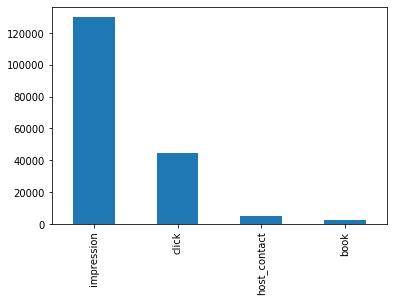

In [23]:
# Hey that's progress, I'll downsample impression and click later
raw_data['label'].value_counts().plot(kind='bar')

In [25]:
raw_data = raw_data.reindex(sorted(raw_data.columns), axis=1)

print(raw_data.filter(regex='preference_').shape)
print(raw_data.filter(regex='listing_').shape)

(182035, 31)
(182035, 31)


In [26]:
raw_data.filter(regex='preference_').columns

Index(['preference_Entire Home', 'preference_Private Room',
       'preference_Shared Room', 'preference_accuracy_rating',
       'preference_checkin_rating', 'preference_cleaning_fee',
       'preference_cleanliness_rating', 'preference_communication_rating',
       'preference_has_pro_pictures', 'preference_instant_bookable',
       'preference_is_new', 'preference_lat', 'preference_lng',
       'preference_location_rating', 'preference_maximum_nights',
       'preference_minimum_nights', 'preference_monthly_discount',
       'preference_monthly_price_factor', 'preference_num_bathrooms',
       'preference_num_bedrooms', 'preference_num_beds',
       'preference_num_books_90day', 'preference_num_recent_reservations',
       'preference_occupancy_rate', 'preference_person_capacity',
       'preference_review_count', 'preference_review_rating',
       'preference_total_price', 'preference_value_rating',
       'preference_weekly_discount', 'preference_weekly_price_factor'],
      dtype

In [27]:
raw_data.filter(regex='listing_').columns

Index(['listing_Entire Home', 'listing_Private Room', 'listing_Shared Room',
       'listing_accuracy_rating', 'listing_checkin_rating',
       'listing_cleaning_fee', 'listing_cleanliness_rating',
       'listing_communication_rating', 'listing_has_pro_pictures',
       'listing_instant_bookable', 'listing_is_new', 'listing_lat',
       'listing_lng', 'listing_location_rating', 'listing_maximum_nights',
       'listing_minimum_nights', 'listing_monthly_discount',
       'listing_monthly_price_factor', 'listing_num_bathrooms',
       'listing_num_bedrooms', 'listing_num_beds', 'listing_num_books_90day',
       'listing_num_recent_reservations', 'listing_occupancy_rate',
       'listing_person_capacity', 'listing_review_count',
       'listing_review_rating', 'listing_total_price', 'listing_value_rating',
       'listing_weekly_discount', 'listing_weekly_price_factor'],
      dtype='object')

In [28]:
raw_data.filter(regex='preference_').fillna(0).tail()

,preference_Entire Home,preference_Private Room,preference_Shared Room,preference_accuracy_rating,preference_checkin_rating,preference_cleaning_fee,preference_cleanliness_rating,preference_communication_rating,preference_has_pro_pictures,preference_instant_bookable,preference_is_new,preference_lat,preference_lng,preference_location_rating,preference_maximum_nights,preference_minimum_nights,preference_monthly_discount,preference_monthly_price_factor,preference_num_bathrooms,preference_num_bedrooms,preference_num_beds,preference_num_books_90day,preference_num_recent_reservations,preference_occupancy_rate,preference_person_capacity,preference_review_count,preference_review_rating,preference_total_price,preference_value_rating,preference_weekly_discount,preference_weekly_price_factor
161222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
162355,0.808511,0.170213,0.021277,3.804168,3.856287,18.135981,3.725258,3.841105,0.021277,0.744681,0.06383,-23.566383,-46.642128,3.835505,757.148936,1.765957,0.531915,0.0,0.0,0.765957,1.446809,9.297872,0.0,0.519247,2.595745,32.553191,3.965941,91.847471,3.714924,0.468085,0.948085
163649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
65668,1.000000,0.000000,0.000000,3.434851,3.457565,38.665016,3.337520,3.406503,0.000000,0.750000,0.25000,-22.982500,-43.195000,3.419369,836.250000,2.000000,0.750000,0.0,0.0,1.000000,2.000000,6.750000,0.0,0.615679,3.250000,16.000000,3.157029,195.924062,3.282266,0.750000,0.957500
146304,1.000000,0.000000,0.000000,4.909091,5.000000,52.596010,4.666666,4.916666,1.000000,0.000000,0.00000,-22.920000,-43.190000,4.818182,1125.000000,1.000000,0.000000,0.0,0.0,3.000000,1.000000,1.000000,0.0,0.011050,8.000000,12.000000,4.916666,4236.608400,4.909091,0.000000,1.000000


In [29]:
raw_data.filter(regex='listing_').fillna(0).tail()

,listing_Entire Home,listing_Private Room,listing_Shared Room,listing_accuracy_rating,listing_checkin_rating,listing_cleaning_fee,listing_cleanliness_rating,listing_communication_rating,listing_has_pro_pictures,listing_instant_bookable,listing_is_new,listing_lat,listing_lng,listing_location_rating,listing_maximum_nights,listing_minimum_nights,listing_monthly_discount,listing_monthly_price_factor,listing_num_bathrooms,listing_num_bedrooms,listing_num_beds,listing_num_books_90day,listing_num_recent_reservations,listing_occupancy_rate,listing_person_capacity,listing_review_count,listing_review_rating,listing_total_price,listing_value_rating,listing_weekly_discount,listing_weekly_price_factor
161222,1,0,0,4.777778,4.972222,91.780030,4.638889,5.000000,0.0,0,0,-22.98,-43.22,4.972222,29.0,2.0,1,0.8,3,3.0,12.0,5.0,0,0.098837,10,35.0,4.771429,318.20584,4.750000,1,0.90
162355,1,0,0,4.875000,4.875000,39.447006,5.000000,4.875000,0.0,0,0,-23.61,-46.64,5.000000,1125.0,1.0,0,1,2,0.0,2.0,2.0,0,0.726316,2,8.0,0.000000,78.89401,5.000000,0,1.00
163649,1,0,0,4.592233,4.851485,35.261574,4.769231,4.865385,0.0,1,0,-22.98,-43.19,4.861386,1125.0,3.0,1,0.8,1,0.0,1.0,0.0,0,0.434286,2,105.0,4.653465,526.05115,4.495050,1,0.95
65668,1,0,0,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.0,1,0,-22.98,-43.19,-1.000000,15.0,5.0,0,1,1,1.0,1.0,1.0,0,0.000000,4,0.0,0.000000,165.09732,-1.000000,0,1.00
146304,1,0,0,4.500000,4.888889,80.000000,4.611111,4.777778,0.0,0,0,-22.92,-43.19,4.500000,1125.0,2.0,1,0.69,3,4.0,1.0,2.0,0,0.062500,7,0.0,4.388889,2826.85000,4.166666,1,0.95


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
preference_scaled = StandardScaler().fit_transform(raw_data.filter(regex='preference_').fillna(0).astype(float))
listing_scaled = StandardScaler().fit_transform(raw_data.filter(regex='listing_').fillna(0).astype(float))


In [33]:
import numpy as np

preference_listing_score = np.sum(preference_scaled * listing_scaled, axis=1)
raw_data['preference_listing_score'] = preference_listing_score

In [34]:
# OOO HELLO highest correlated factor to click so far
# I probably could find some more created columns that required much less work, but that was fun

raw_data[['preference_listing_score', 'book', 'host_contact', 'click']].corr()['preference_listing_score']

preference_listing_score    1.000000
book                        0.023778
host_contact                0.029949
click                       0.079526
Name: preference_listing_score, dtype: float64

In [35]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score


In [36]:
from sklearn.preprocessing import FunctionTransformer

# function to filter dataframe by a column regex
def select_col_regex(X, regex):
    return X.filter(regex=regex)


grab_listing_cols = FunctionTransformer(lambda x: select_col_regex(x, regex='^listing_*'), validate=False)
grab_query_cols = FunctionTransformer(lambda x: select_col_regex(x, regex='^query_*'), validate=False)
grab_preference_cols = FunctionTransformer(lambda x: select_col_regex(x, regex='^preference_*'), validate=False)
grab_preference_listing_col = FunctionTransformer(lambda x: select_col_regex(x, regex='^preference_listing*'), validate=False)


In [37]:
def down_sample(df, by, multiplier=1., match_dist=True):

    index = []
    vc = df['label'].value_counts()
    size_by_name = dict(vc)
    smallest_label_group_size = vc[-1]
    smallest_label_group_name = vc.index[-1]
    for unique_item in df[by].unique():
        if unique_item == smallest_label_group_name:
            continue
        frac = 1.-(float(multiplier*smallest_label_group_size)/size_by_name[unique_item])
        if match_dist:  # will try to match the original distribution more
            frac *= size_by_name[unique_item]/sum(size_by_name.values())
        frac = max(frac, 0.)
        print(f"removing {frac*100:.2f}% from {unique_item}")
        index += list(df[df[by].isin([unique_item])].sample(frac=frac).index)

    return df.drop(index), index


removing 68.97% from impression
removing 21.98% from click
removing 0.44% from host_contact


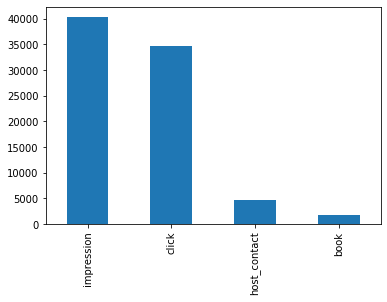

In [38]:
X_downsample, _ = down_sample(raw_data, 'label', multiplier=2)

X_downsample['label'].value_counts().plot(kind='bar')

Removing ds_book, ds_contact, listing_cleaning_fee, preference_Entire Home, preference_Private Room, preference_Shared Room, preference_accuracy_rating, preference_checkin_rating, preference_cleaning_fee, preference_cleanliness_rating, preference_communication_rating, preference_has_pro_pictures, preference_instant_bookable, preference_is_new, preference_lat, preference_lng, preference_location_rating, preference_maximum_nights, preference_minimum_nights, preference_monthly_discount, preference_monthly_price_factor, preference_num_bathrooms, preference_num_bedrooms, preference_num_beds, preference_num_books_90day, preference_num_recent_reservations, preference_occupancy_rate, preference_person_capacity, preference_review_count, preference_review_rating, preference_total_price, preference_value_rating, preference_weekly_discount, preference_weekly_price_factor
(182035, 86)


/Users/sinanozdemir/Desktop/airbnb_takehome/env/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(182035, 47)
removing 70.31% from impression
removing 19.62% from click
removing 0.00% from host_contact
(63274, 47)


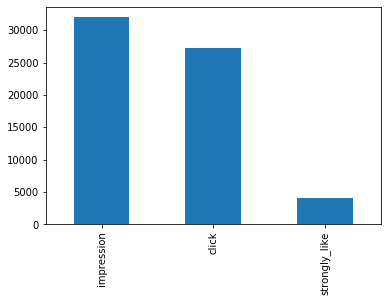

In [39]:
# parameter to combine host_contact and book as a single label "strongly_like"
combine_labels = True


min_percent_remove_null = .15
# Totally remove cols with > 15% of missing values, any other cols will have values dynamically imputed
cols_with_too_many_missing_values = list(raw_data.columns[raw_data.isnull().sum()/raw_data.shape[0] > min_percent_remove_null])
cols_with_too_many_missing_values_str = (", ".join(cols_with_too_many_missing_values))
print(f"Removing {cols_with_too_many_missing_values_str}")

# shape before any removing of rows/cols
print(raw_data.shape)

# drop columns I have deemed not helpful or have too many missing values
X = raw_data.drop(['query_price_max', 'query_price_min',
                   'query_checkin', 'query_checkout', 'query_market']+cols_with_too_many_missing_values, axis=1)
# create response variable
y = raw_data['label']

if combine_labels:
    # combine the labels book and host_contact as category "strongly like" and use click as "like" and impression as "other"
    y[y.isin(['host_contact', 'book'])] = 'strongly_like'

# see how many rows/cols are left
print (X.shape)

# make a training/validation set by date cutoff (not just random sample) 
validation_cutoff = int(raw_data.shape[0]*.8)
training_X, validation_X, training_y, validation_y = X[:validation_cutoff], X[validation_cutoff:], y[:validation_cutoff], y[validation_cutoff:]

# downsample impression and click seperately to create a more even class balance
downsampled_training_X, index = down_sample(training_X, 'label', multiplier=3)
downsampled_training_y = training_y.drop(index)

print(downsampled_training_X.shape)

# Make the classes a bit more equal in the training set but not touch the validation set to keep things fair
# for our validation metrics
downsampled_training_y.value_counts().plot(kind='bar')


In [40]:
gather_features = FeatureUnion([
    ('listing', grab_listing_cols),
#     ('query', grab_query_cols),
#     ('preference', grab_preference_cols),
    ('preference_listing', grab_preference_listing_col)
])

# show row/col of data actually being passed into model
print(gather_features.fit_transform(training_X).shape)

pipeline = Pipeline([
  ('gather_features', gather_features),
#   ("convert_to_float", FunctionTransformer(lambda X: X.astype(float))),
  ('impute', SimpleImputer()),
  ("standardize", StandardScaler()),
  ("normalize", Normalizer()),
  ("poly", PolynomialFeatures()),
  ("select", SelectFromModel(DecisionTreeClassifier())),
  ('svd', TruncatedSVD()),  # PCA because there will be dependence between columns (will lose interpretibility but c'est la vie)
  ('classifier', VotingClassifier([
      ("forest", RandomForestClassifier()),
      # TODO could try SGDClassifier because of the number of rows
      ('knn', KNeighborsClassifier())
  ]))
])


(145628, 31)


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

grid_params = {
    'impute__strategy': ['mean'],
    'standardize__with_mean': [True],
    'standardize__with_std': [True],
    'poly__degree': [2],
    'select__threshold': ['mean', 'median'],
    'svd__n_components': [10],
    'classifier__knn__n_neighbors': [9],
    'classifier__forest__max_depth': [None],
    'classifier__forest__n_estimators': [50],
    "classifier__forest__class_weight": ["balanced_subsample", "balanced"],
    "classifier__forest__criterion": ["gini", "entropy"],
    "classifier__weights": [[.9, .1], [.1, .9], [.5, .5]],
    'classifier__voting': ['hard']
}

# custom scorer that maximizes precision only for non impression labels
def precision_labels_only(y_true, y_pred, labels, **kwargs):
    """
    subset the prediction array to include only labels in the labels kwarg and calculate precision with
    those predictions alone. This gives us a sense for precision only for labels we care about most
    """
    indices = np.isin(y_pred, labels)
    return precision_score(y_true[indices], y_pred[indices], **kwargs)

custom_micro_precision = make_scorer(lambda y_true, y_pred: precision_labels_only(y_true, y_pred, ['host_contact', 'click', 'book', 'strongly_like'], average='micro'))

grid = GridSearchCV(pipeline, 
                    grid_params, 
                    error_score=-1, 
                    verbose=10, 
                    scoring={
                        'custom_micro_precision': custom_micro_precision,
                        'precision': make_scorer(lambda y_true, y_pred: precision_score(y_true, y_pred, average='micro')),
                        'accuracy': make_scorer(accuracy_score)
                    }, 
                    cv=3,
                    refit='custom_micro_precision')

grid.fit(downsampled_training_X, downsampled_training_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 
[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.558, custom_micro_precision=0.527, precision=0.558, total= 1.4min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=No

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.544, custom_micro_precision=0.502, precision=0.544, total= 1.7min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.539, custom_micro_precision=0.497, precision=0.539, total= 1.8min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.9min remaining:    0.0s


[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.561, custom_micro_precision=0.531, precision=0.561, total= 1.7min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.6min remaining:    0.0s


[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.543, custom_micro_precision=0.500, precision=0.543, total= 1.8min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.4min remaining:    0.0s


[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.541, custom_micro_precision=0.498, precision=0.541, total= 1.7min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 10.0min remaining:    0.0s


[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.550, custom_micro_precision=0.513, precision=0.550, total= 1.4min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 11.5min remaining:    0.0s


[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.535, custom_micro_precision=0.492, precision=0.535, total= 1.4min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 12.8min remaining:    0.0s


[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.539, custom_micro_precision=0.494, precision=0.539, total= 1.5min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 14.3min remaining:    0.0s


[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.553, custom_micro_precision=0.518, precision=0.553, total= 1.5min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 
[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=gini, classifier__forest__max_dep

[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=entropy, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.544, custom_micro_precision=0.502, precision=0.544, total= 1.2min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=entropy, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 
[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=entropy, classifier__forest__ma

[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=entropy, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.538, custom_micro_precision=0.493, precision=0.538, total= 1.3min
[CV] classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=entropy, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.5, 0.5], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 
[CV]  classifier__forest__class_weight=balanced_subsample, classifier__forest__criterion=entropy, classifier__forest__

[CV]  classifier__forest__class_weight=balanced, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.552, custom_micro_precision=0.522, precision=0.552, total= 1.7min
[CV] classifier__forest__class_weight=balanced, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 
[CV]  classifier__forest__class_weight=balanced, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n

[CV]  classifier__forest__class_weight=balanced, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.5, 0.5], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.540, custom_micro_precision=0.492, precision=0.540, total= 1.4min
[CV] classifier__forest__class_weight=balanced, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.5, 0.5], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 
[CV]  classifier__forest__class_weight=balanced, classifier__forest__criterion=gini, classifier__forest__max_depth=None, classifier__forest__n_est

[CV]  classifier__forest__class_weight=balanced, classifier__forest__criterion=entropy, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.9, 0.1], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.539, custom_micro_precision=0.495, precision=0.539, total= 1.4min
[CV] classifier__forest__class_weight=balanced, classifier__forest__criterion=entropy, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.1, 0.9], impute__strategy=mean, poly__degree=2, select__threshold=mean, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 
[CV]  classifier__forest__class_weight=balanced, classifier__forest__criterion=entropy, classifier__forest__max_depth=None, classifier__fo

[CV]  classifier__forest__class_weight=balanced, classifier__forest__criterion=entropy, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.5, 0.5], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10, accuracy=0.554, custom_micro_precision=0.509, precision=0.554, total= 1.4min
[CV] classifier__forest__class_weight=balanced, classifier__forest__criterion=entropy, classifier__forest__max_depth=None, classifier__forest__n_estimators=50, classifier__knn__n_neighbors=9, classifier__voting=hard, classifier__weights=[0.5, 0.5], impute__strategy=mean, poly__degree=2, select__threshold=median, standardize__with_mean=True, standardize__with_std=True, svd__n_components=10 
[CV]  classifier__forest__class_weight=balanced, classifier__forest__criterion=entropy, classifier__forest__max_depth=None, classifier__

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 108.6min finished


GridSearchCV(cv=3, error_score=-1,
             estimator=Pipeline(memory=None,
                                steps=[('gather_features',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('listing',
                                                                        FunctionTransformer(accept_sparse=False,
                                                                                            check_inverse=True,
                                                                                            func=<function <lambda> at 0x152c1b170>,
                                                                                            inv_kw_args=None,
                                                                                            inverse_func=None,
                                                                                            kw_args=None,
                           

In [42]:
print("best custom precision metric was {}".format(grid.best_score_))

best custom precision metric was 0.45095525665431746


In [56]:
grid.best_params_

{'classifier__forest__class_weight': 'balanced',
 'classifier__forest__criterion': 'entropy',
 'classifier__forest__max_depth': None,
 'classifier__forest__n_estimators': 50,
 'classifier__knn__n_neighbors': 9,
 'classifier__voting': 'hard',
 'classifier__weights': [0.9, 0.1],
 'impute__strategy': 'mean',
 'poly__degree': 2,
 'select__threshold': 'median',
 'standardize__with_mean': True,
 'standardize__with_std': True,
 'svd__n_components': 10}

In [43]:
best_pipeline = grid.best_estimator_

In [44]:
validation_pred = best_pipeline.predict(validation_X)

impression       0.714319
click            0.958728
strongly_like    1.000000
Name: label, dtype: float64


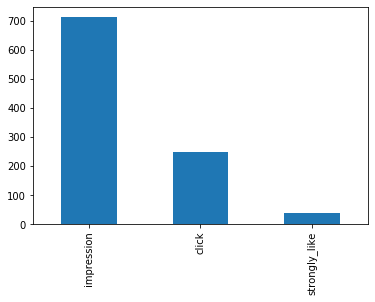

In [45]:
import random

# create cumulative sum of probability distribution
vc = y.value_counts(normalize=True).cumsum()
print(vc)

# will randomly guess a label that should match the distribution
def null_model(row):
    return vc.index[vc > random.uniform(0, 1)][0]

random_guesses = pd.Series([null_model(i) for i in range(1000)])
# yep, that matches the distribution
random_guesses.value_counts().plot(kind='bar')

null_model_preds = pd.Series([null_model(i) for i in range(validation_y.shape[0])])


In [46]:
print(accuracy_score(y_true=validation_y, y_pred=null_model_preds))
print(confusion_matrix(y_true=validation_y, y_pred=null_model_preds))
print(classification_report(y_true=validation_y, y_pred=null_model_preds))
print(precision_labels_only(validation_y, null_model_preds, ['host_contact', 'click', 'book', 'strongly_like'], average='micro'))


0.5147361771087977
[[ 2677  7524   428]
 [ 5523 15949   875]
 [  802  2515   114]]
               precision    recall  f1-score   support

        click       0.30      0.25      0.27     10629
   impression       0.61      0.71      0.66     22347
strongly_like       0.08      0.03      0.05      3431

     accuracy                           0.51     36407
    macro avg       0.33      0.33      0.33     36407
 weighted avg       0.47      0.51      0.49     36407

0.267875995776946


In [47]:
# Overall accuracy is worse than null model but I care more about precision of book, click and host_contacts
# This way I minimize false positives (I don't show them as many listings I think they'll like but they end up not liking)
print(accuracy_score(y_true=validation_y, y_pred=validation_pred))
print(confusion_matrix(y_true=validation_y, y_pred=validation_pred))
print(classification_report(y_true=validation_y, y_pred=validation_pred))
print(precision_labels_only(validation_y, validation_pred, ['host_contact', 'click', 'book', 'strongly_like'], average='micro'))

0.43917378526107614
[[ 6653  3898    78]
 [13056  9268    23]
 [ 2024  1339    68]]
               precision    recall  f1-score   support

        click       0.31      0.63      0.41     10629
   impression       0.64      0.41      0.50     22347
strongly_like       0.40      0.02      0.04      3431

     accuracy                           0.44     36407
    macro avg       0.45      0.35      0.32     36407
 weighted avg       0.52      0.44      0.43     36407

0.30686695278969955


In [48]:
"""
Why I want to optimize for precision over something like f1 or accuracy or recall(sensitivity):
- It's about trust. We want our users to trust our model and precision is nearly a direct correlation to building trust.
- If we optimize or recall, then we are optimizing for putting in front of them as many properties as possible as we think they'll like.
- Now obviously that sounds great but optimizing for precision allows us to solve for "When we do put a property in front of them, we are certain that they will love its"
- This isn't to say that recall, F1, etc aren't important. I merely want to demonstrate that metrics have different interpretations and that matters when mapping our data science to the business case

"""

'\nWhy I want to optimize for precision over something like f1 or accuracy or recall(sensitivity):\n- It\'s about trust. We want our users to trust our model and precision is nearly a direct correlation to building trust.\n- If we optimize or recall, then we are optimizing for putting in front of them as many properties as possible as we think they\'ll like.\n- Now obviously that sounds great but optimizing for precision allows us to solve for "When we do put a property in front of them, we are certain that they will love its"\n- This isn\'t to say that recall, F1, etc aren\'t important. I merely want to demonstrate that metrics have different interpretations and that matters when mapping our data science to the business case\n\n'

In [49]:
# Further ideas:
# 1. Something like SMOTE to add more host_contact and book labels
# 2. Assign point values to labels and make a regression model to act as a sorting mechanism
# 3. play with decision threshold (> .8, .9, etc) to optimize for precision
# 4. seperate models for host_contact and book than for clicking. The idea being that the context between the two
#    situations are different (if we are predicting host_contact or book, the click has already happened)
# 5. dot product preference vector and listing vector to create a "listing_preference vector"
#    This would reduce number of cols by a lot
# 6. use listing_lat, listing_lng to get avg house prices in the area
# 7. Create a custom F1 Score that takes into account recall and precision
# 8. put this model on top of a spark cluster to parallelize training/fitting
# 9. A cluster preprocessing step to group properties by features into similar categories
# 10. request ameneties, comments, and bio! That seems important when making a decision on if I want to stay at a place
#     and we can use NLP to update the user's preference on what kinds of places they like to stay at